In [102]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL1.py Application outputs
results = [{
        "title":"WDBC - UnStandardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-unstandardized-sgd-results.txt"),
    },{
        "title":"WDBC - Standardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-standardized-sgd-results.txt"),
    },{
        "title":"IRIS - UnStandardized",
        "limits": [0.2, 1.0], # On IRIS the limit is lower than on WDBC
        "adam": np.loadtxt("iris-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-unstandardized-sgd-results.txt"),
    },{
        "title":"IRIS - Standardized",
        "limits": [0.2, 1.0], # On IRIS the limit is lower than on WDBC
        "adam": np.loadtxt("iris-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-standardized-sgd-results.txt"),
    }]


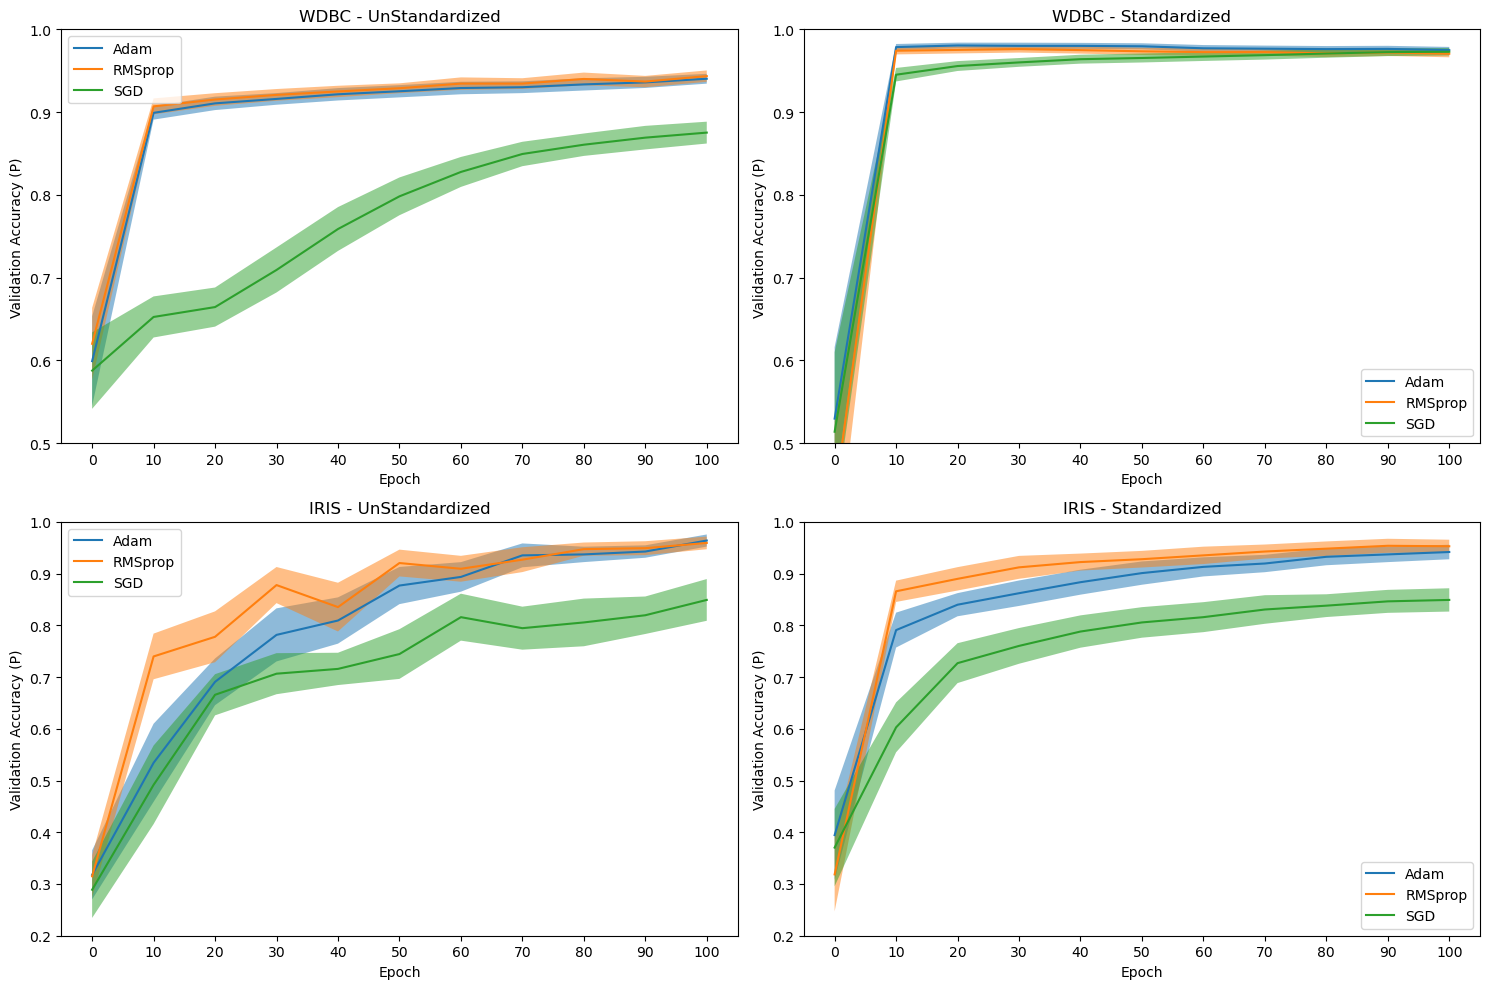

In [103]:
# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title(results[i]["title"])

    # Setup Adam - Optimized
    data = results[i]["adam"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='Adam')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup RMSprop - Optimized
    data = results[i]["rmsprop"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='RMSprop')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup SGD - Optimized
    data = results[i]["sgd"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='SGD')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_ylim(results[i]["limits"])
    axis.set_xlabel('Epoch')
    axis.set_xticks(ticks=np.arange(0, 11), labels=np.arange(0, 110, 10))
    axis.legend() 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Ansers to OL1 Questions:

## Answer 1
Looking over the plots from above it seems that the SGD optimizer benefited the most from standardizing the input values. 

## Answer 2
The main advantanges to helping the SGD optimizer by standarization is the convergence is fastster because input features (especially in the WDBC) have different scales. Using the standarization made the inputs all the same scale and so making adjustments during the learing / opitmizaiton process helped to not over and under-correct on epochs adn hence get the a result in a more smoother way.

## Anser 3
A few things come to mind:
1. Work on a more deteiled learing rate for the different optimizers. Mayeb adjust it based on if I did or did not use starandariztion of the input data.
2. In my case I should try and clean up in a better way teh output on the mult-class classification models. It seems like I had to adjust the `y_pred` to be a different datatype when processing the training and validation steps in the model.
3. Determine how much data and/or I really need to train the models. As an exampel I fidn the after about ~50 epoch the prediction rates did not get materially better.
4. Look at different standardization for the data. It seems that on the WDBC data standardization helped immensly however ont he IRSI data it had  less of an effect.

## Answer 4
Looking over my plots above I feel the most avanegous would the WDBC standardized data. It seems to converge to the highest prediction rate at 50 epochs an then only shows little improvements. I therefore think in it's case I would see not too much of a lower predition rate whe using 50 epochs and would get my results much faster. 

## Answer 5
In terms of how...

## Answer 6

## Answer 7





